<a href="https://colab.research.google.com/github/lucaslattari/Python_OpenCV4/blob/master/02_basics_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

Maiores explicações com relação a esse código encontram-se disponíveis em https://universodiscreto.com/2020/02/14/operacoes-basicas-envolvendo-imagens-python-e-opencv4-01/

In [0]:
import numpy as np
import cv2

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ada.jpg to ada (1).jpg
User uploaded file "ada.jpg" with length 102040 bytes


O código acima é fundamental para disponibilizarmos uma imagem de entrada a ser processada por nosso algoritmo. A função **files.upload()** carrega o elemento de interface gráfica em que você escolhe a imagem diretamente de seu disco rígido.

Logo abaixo há um laço *for* que percorre cada arquivo que foi submetido ao servidor (no caso será apenas um) imprimindo na tela a informação contendo o tamanho em bytes da imagem em questão. Esse dado é importante até para depurarmos se o upload foi feito corretamente.

In [0]:
def showImage(img):
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [0]:
def getImageWithRedColorOnly(img):
    altura, largura, cores = img.shape
    for y in range(0, altura):
        for x in range(0, largura):
            azul = img.item(y, x, 0) #posição x, y e a coordenada de cor (0 é azul)
            verde = img.item(y, x, 1) #posição x, y e a coordenada de cor (1 é verde)
            vermelho = img.item(y, x, 2) #posição x, y e a coordenada de cor (2 é vermelho)

            img.itemset((y, x, 0), 0) #na posição x, y e coordenada azul, atribui-se o valor 0
            img.itemset((y, x, 1), 0) #na posição x, y e coordenada vermelha, atribui-se o valor 0
            #como vamos manter o vermelho como está, não é necessário adicionar uma chamada para tal

    return img

In [0]:
  img = cv2.imread("ada.jpg")
  print("As dimensões dessa imagem são: " + str(img.shape))

As dimensões dessa imagem são: (756, 368, 3)


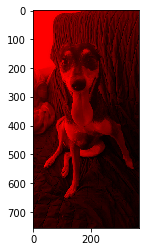

In [0]:
imgNewCopy = img.copy() #criamos uma cópia aqui para que a imagem original não seja modificada com o tom vermelho

redCopyImg = getImageWithRedColorOnly(imgNewCopy)
showImage(redCopyImg)

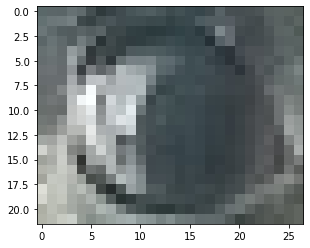

In [0]:
  eye = img[168:190,97:124]
  showImage(eye)


In [0]:
%matplotlib inline
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 798kB 2.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=f4ae86cfc098b4886c28bc6639382d8b5b1dba3c2d76ffcdf51e77758939e461
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


O código acima é necessário para adicionarmos algumas funcionalidades junto à interface gráfica para exibição da imagem da matplotlib no jupyter, como o zoom.

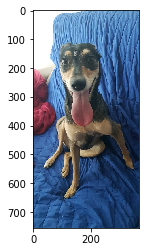

In [0]:
  img[137 : 137 + eye.shape[0] , 141 : 141 + eye.shape[1]] = eye
  showImage(img)
